# Quesiton 4: An Explorationg of Genres. How do Gross Revenue and ROI change across genres?

### findings:
ROI varies hugely based on the Genre - That is some genres are inherently profitable, others are loss making

### Recommendations:
Focus on Animation, Adventure and Mystery films as these yield the highest return. Steer clear of Documentaries, as they are loss making, on average. 

# Importing Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../cleandata/randomgenreallocated.csv', index_col = 0)

In [4]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,genres,randomgenre
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",Action
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,"['Action', 'Adventure', 'Fantasy']",Action
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,"['Action', 'Adventure', 'Science Fiction']",Action
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,2,0,Friday,4,5.827114,0.853525,1748134200,"['Action', 'Adventure', 'Fantasy']",Fantasy
8,9,2017-11-17,Justice League,300000000,229024295,655945209,2017,3,0,Friday,11,1.186484,0.542645,355945209,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",Science Fiction


In [5]:
# Making sure the null values are gone

In [6]:
df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year_released        0
age                  0
decades              0
day                  0
month                0
markup               0
profitmargin         0
netprofit            0
genres               0
randomgenre          0
dtype: int64

In [7]:
# checking number of movies in each genre

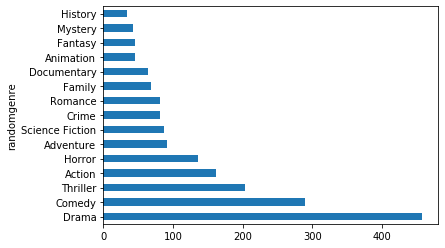

In [8]:
df.groupby(['randomgenre'])['movie'].count().sort_values(ascending = False)[:15].plot(kind = 'barh')

In [9]:
# Adding a ROI Column

In [10]:
df['ROI'] = df['markup']*100

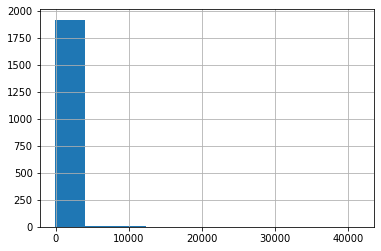

In [11]:
df['ROI'].hist()

In [12]:
# Checking High Markups by Genre - all thriller and horror

In [13]:
df.loc[df['ROI'] > 20000]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,genres,randomgenre,ROI
5536,37,1978-10-17,Halloween,325000,47000000,70000000,1978,42,4,Tuesday,10,214.384615,0.995357,69675000,"['Horror', 'Thriller']",Thriller,21438.461538
5676,77,1968-10-01,Night of the Living Dead,114000,12087064,30087064,1968,52,5,Tuesday,10,262.921614,0.996211,29973064,['Horror'],Horror,26292.161404
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,2015,5,0,Friday,7,415.564740,0.997599,41556474,"['Horror', 'Thriller']",Horror,41556.474000


# Exploring Average ROI by Genre

In [14]:
dfmedianROI = pd.DataFrame(df.groupby('randomgenre')['ROI'].median().sort_values(ascending = False))
dfmedianROI.reset_index(inplace = True)
dfmedianROI

,randomgenre,ROI
0,Animation,187.687655
1,Adventure,163.339677
2,Mystery,139.930527
3,Science Fiction,138.493409
4,War,135.857985
5,Fantasy,132.026349
6,Family,113.506906
7,Comedy,102.955240
8,Romance,95.350050
9,History,89.751817


Text(0, 0.5, 'ROI')

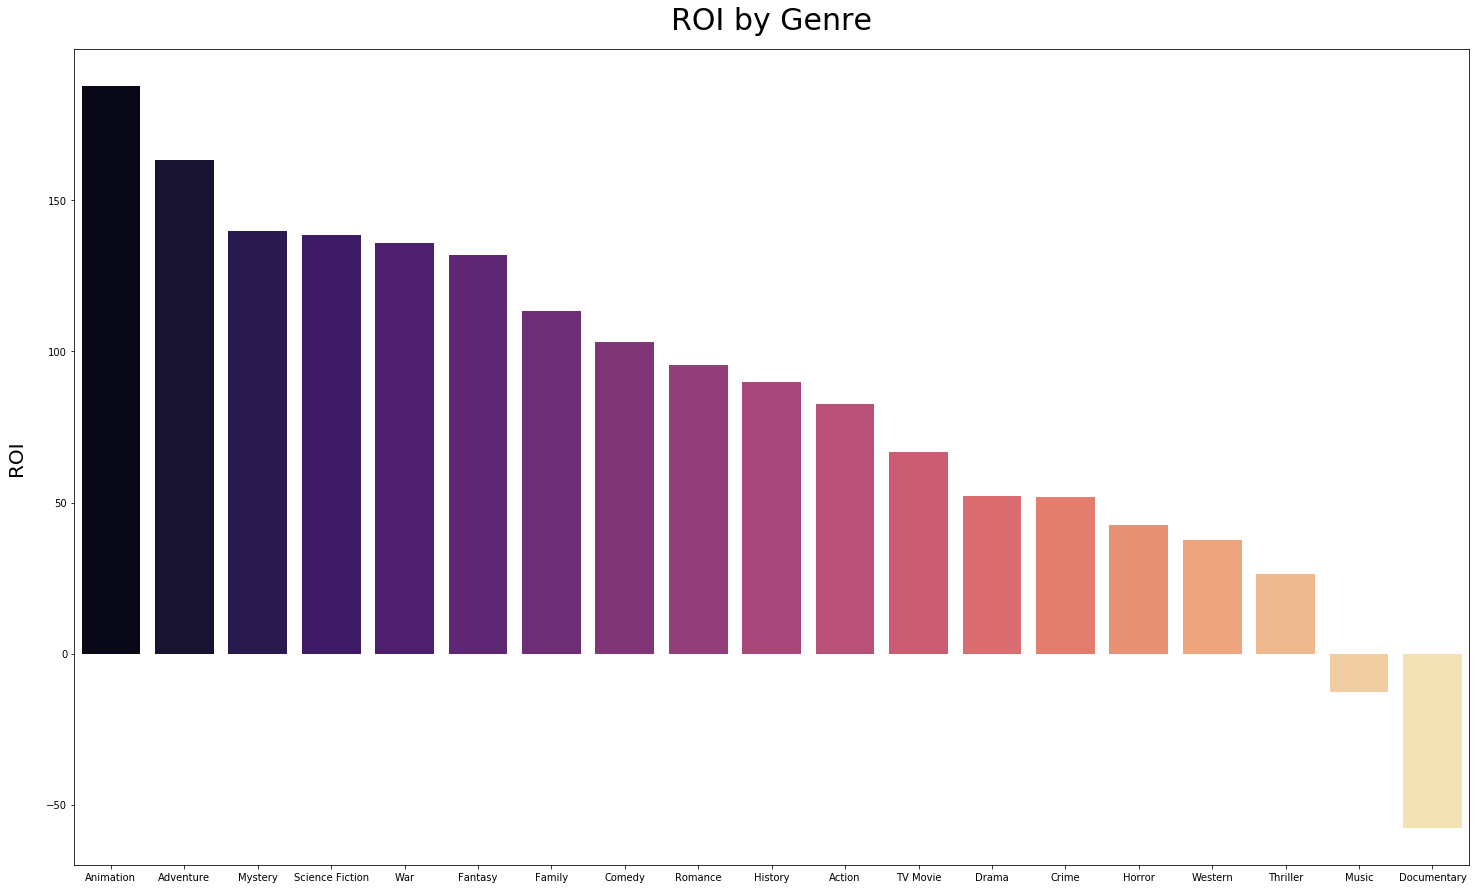

In [15]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(25,15))
sns.barplot(x = 'randomgenre', y = 'ROI', data = dfmedianROI, palette = 'magma')
plt.title("ROI by Genre",pad= 20, size = 30)
plt.xlabel("")
plt.ylabel("ROI", labelpad=20,size = 20)

In [16]:
df.loc[df['randomgenre']=='Documentary'].sort_values(by = 'worldwide_gross',ascending = True)[:25]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,genres,randomgenre,ROI
5725,26,2014-12-31,The Image Revolution,50000,0,0,2014,6,0,Wednesday,12,-1.000000,-inf,-50000,['Documentary'],Documentary,-100.000000
5207,8,2013-12-31,The Vatican Exorcisms,1100000,0,0,2013,7,0,Tuesday,12,-1.000000,-inf,-1100000,"['Documentary', 'Horror', 'Mystery']",Documentary,-100.000000
5723,24,2015-08-04,Bending Steel,50000,0,0,2015,5,0,Tuesday,8,-1.000000,-inf,-50000,['Documentary'],Documentary,-100.000000
4809,10,2011-04-01,"Fat, Sick & Nearly Dead",2600000,0,0,2011,9,0,Friday,4,-1.000000,-inf,-2600000,['Documentary'],Documentary,-100.000000
5476,77,2015-07-24,The Outrageous Sophie Tucker,500000,0,0,2015,5,0,Friday,7,-1.000000,-inf,-500000,['Documentary'],Documentary,-100.000000
5600,1,2015-02-24,Give Me Shelter,250000,0,0,2015,5,0,Tuesday,2,-1.000000,-inf,-250000,['Documentary'],Documentary,-100.000000
2329,30,2019-12-31,Reagan,25000000,0,0,2019,1,0,Tuesday,12,-1.000000,-inf,-25000000,['Documentary'],Documentary,-100.000000
5663,64,2013-05-03,Aroused,150000,0,0,2013,7,0,Friday,5,-1.000000,-inf,-150000,['Documentary'],Documentary,-100.000000
5691,92,2012-05-18,Indie Game: The Movie,100000,0,0,2012,8,0,Friday,5,-1.000000,-inf,-100000,['Documentary'],Documentary,-100.000000
5694,95,2015-03-17,Closure,100000,0,0,2015,5,0,Tuesday,3,-1.000000,-inf,-100000,['Documentary'],Documentary,-100.000000


In [17]:
df.corr()

,id,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,month,markup,profitmargin,netprofit,ROI
id,1.000000,-0.056528,-0.027844,-0.045121,-0.023152,0.023152,0.015900,-0.011247,0.032219,0.043498,-0.038662,0.032219
production_budget,-0.056528,1.000000,0.723801,0.797135,0.098423,-0.098423,-0.083787,0.003138,-0.043941,0.029158,0.682663,-0.043941
domestic_gross,-0.027844,0.723801,1.000000,0.943844,0.026518,-0.026518,-0.009758,0.011814,0.101808,0.028825,0.938115,0.101808
worldwide_gross,-0.045121,0.797135,0.943844,1.000000,0.065354,-0.065354,-0.048313,0.017587,0.081693,0.025620,0.985392,0.081693
year_released,-0.023152,0.098423,0.026518,0.065354,1.000000,-1.000000,-0.951550,-0.018586,-0.166773,-0.015060,0.051333,-0.166773
age,0.023152,-0.098423,-0.026518,-0.065354,-1.000000,1.000000,0.951550,0.018586,0.166773,0.015060,-0.051333,0.166773
decades,0.015900,-0.083787,-0.009758,-0.048313,-0.951550,0.951550,1.000000,0.024706,0.169015,0.015455,-0.034837,0.169015
month,-0.011247,0.003138,0.011814,0.017587,-0.018586,0.018586,0.024706,1.000000,0.001740,-0.037694,0.020399,0.001740
markup,0.032219,-0.043941,0.101808,0.081693,-0.166773,0.166773,0.169015,0.001740,1.000000,0.013132,0.111260,1.000000
profitmargin,0.043498,0.029158,0.028825,0.025620,-0.015060,0.015060,0.015455,-0.037694,0.013132,1.000000,0.022772,0.013132


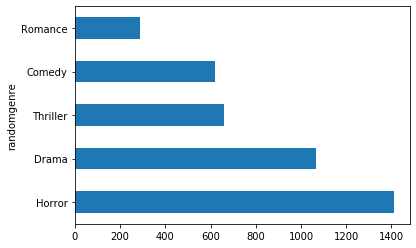

In [18]:
df.groupby(['randomgenre'])['markup'].sum().sort_values(ascending = False)[:5].plot(kind = 'barh')

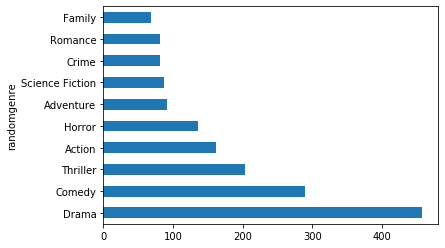

In [19]:
df.groupby(['randomgenre'])['movie'].count().sort_values(ascending = False)[:10].plot(kind = 'barh')

# Creating a DataFrame for the top 10 Genres by number of movies released

In [20]:
top10bycount = pd.DataFrame(df.groupby(['randomgenre'])['movie'].count().sort_values(ascending = False)[:10])

In [21]:
top10bycount.reset_index(inplace = True)

Text(0.5, 0, '')

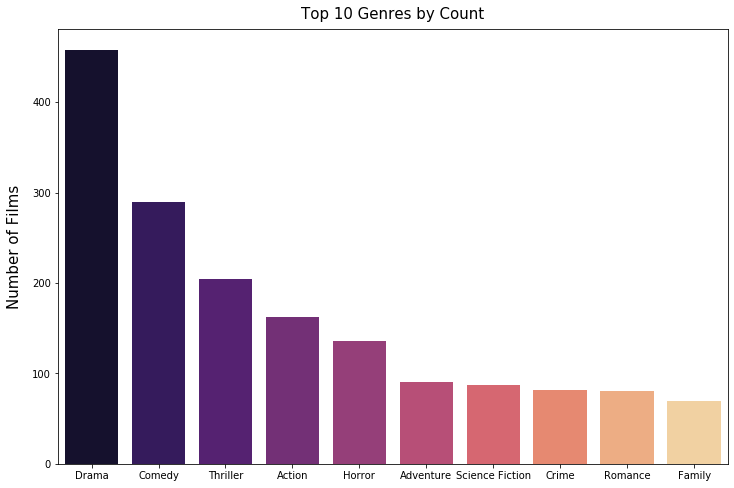

In [22]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax = sns.barplot(x='randomgenre', y ='movie', data = top10bycount, palette = 'magma')

ax.set_title("Top 10 Genres by Count", pad = 10,size = 15)
ax.set_ylabel("Number of Films", labelpad = 10, size = 15)
ax.set_xlabel("")

# Top 5 genres by movies released for deeper analysis 

In [23]:
top5genres = df.groupby(['randomgenre'])['movie'].count().sort_values(ascending = False)[:5]
top5genres

randomgenre
Drama       458
Comedy      289
Thriller    204
Action      162
Horror      136
Name: movie, dtype: int64

In [24]:
top5genresdf = df.loc[(df['randomgenre']=='Drama') | (df['randomgenre']=='Comedy') |(df['randomgenre']=='Thriller') | 
                      (df['randomgenre']=='Action') | (df['randomgenre']=='Horror')]

In [25]:
top5genresdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,genres,randomgenre,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",Action,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,"['Action', 'Adventure', 'Fantasy']",Action,154.667286
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,"['Action', 'Adventure', 'Science Fiction']",Action,324.384139
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,2012,8,0,Friday,7,2.943415,0.746413,809439099,"['Action', 'Crime', 'Drama', 'Thriller']",Drama,294.341491
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,2018,2,0,Friday,5,0.429641,0.300524,118151347,"['Action', 'Adventure', 'Science Fiction']",Action,42.964126


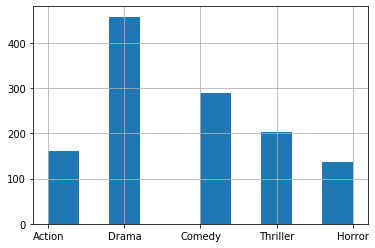

In [26]:
top5genresdf['randomgenre'].hist()

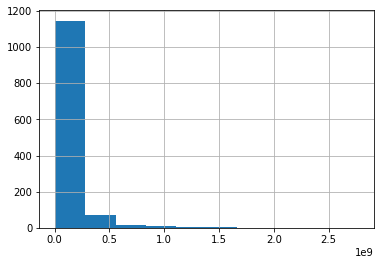

In [27]:
top5genresdf['worldwide_gross'].hist()

In [28]:
# Given how skewed Worldwide gross is - use median

In [55]:
top5genresdf.groupby('randomgenre')['worldwide_gross'].agg(['sum','mean','median','count','max','min'])

,sum,mean,median,count,max,min
randomgenre,,,,,,
Action,34268068745,2.115313e+08,84977313.5,162,2776345279,0
Comedy,27709660631,9.588118e+07,42493506.0,289,1160336173,0
Drama,28878172003,6.305278e+07,21757876.5,458,1084439099,0
Horror,7859010734,5.778684e+07,24463026.0,136,697457969,0
Thriller,17114318134,8.389372e+07,18575081.0,204,1518722794,0


Text(0, 0.5, 'Worldwide Gross in Billions (USD)')

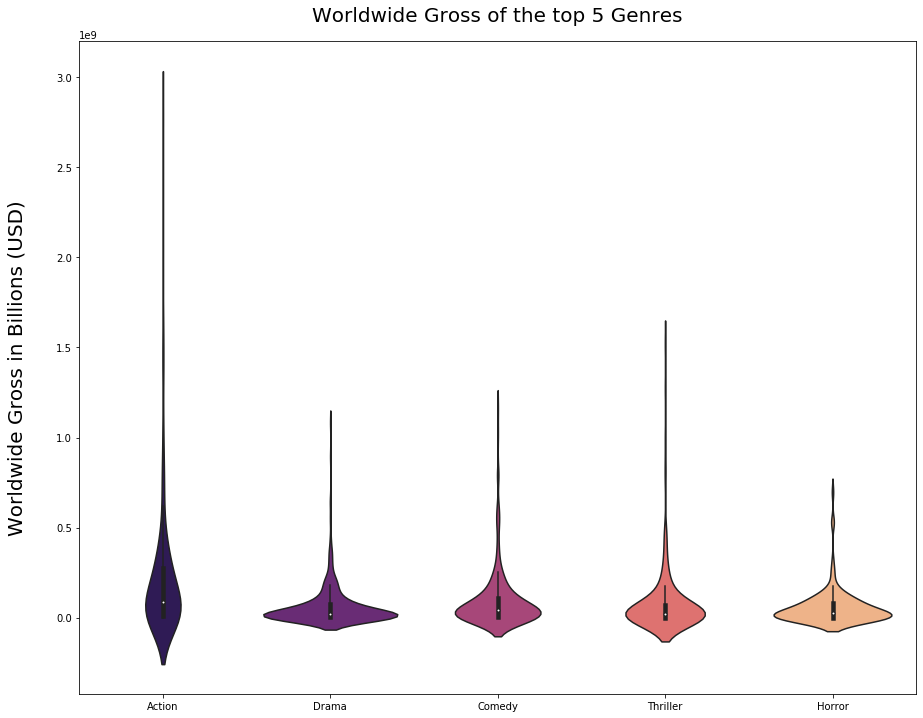

In [30]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,12))
ax = sns.violinplot(x = 'randomgenre', y = 'worldwide_gross', data=top5genresdf, palette = 'magma')
ax.set_title("Worldwide Gross of the top 5 Genres", size = 20, pad = 20)
ax.set_xlabel("")
ax.set_ylabel("Worldwide Gross in Billions (USD)",labelpad = 30, size = 20)


In [31]:
top5genresdf['worldwide_gross'].max()

2776345279

In [32]:
top5genresdf['worldwide_gross'].max()

2776345279

Text(0, 0.5, 'Worldwide Net in Billions (USD)')

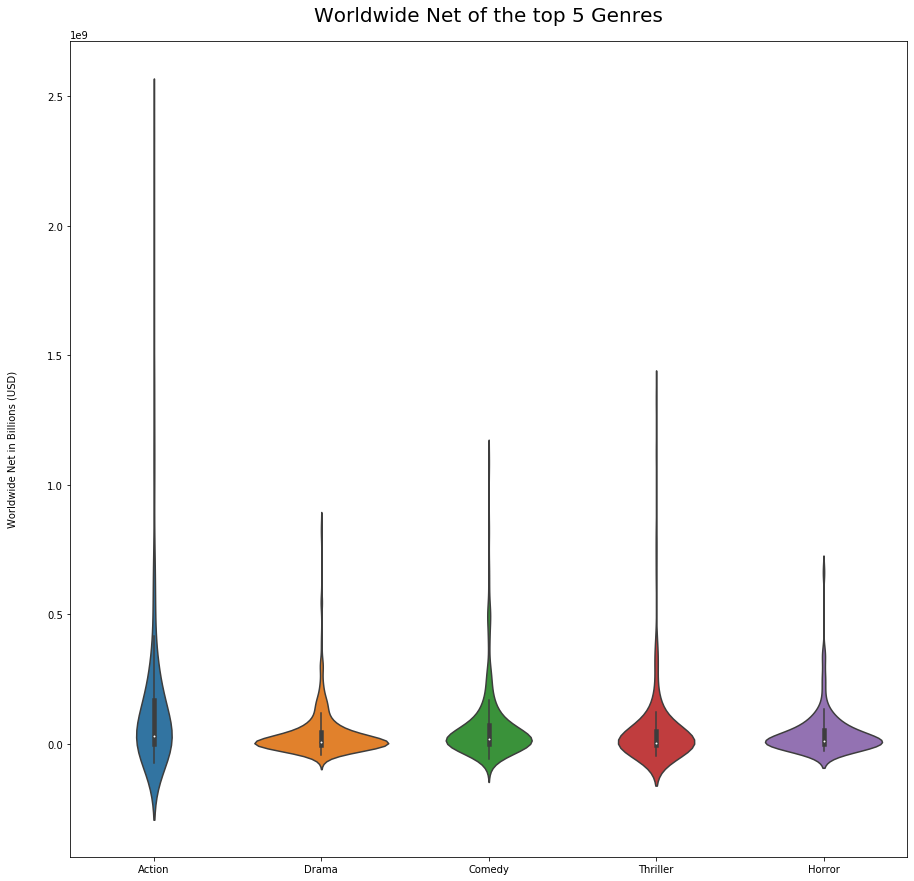

In [33]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax = sns.violinplot(x = 'randomgenre', y = 'netprofit', data=top5genresdf)
ax.set_title("Worldwide Net of the top 5 Genres", size = 20, pad = 20)
ax.set_xlabel("")
ax.set_ylabel("Worldwide Net in Billions (USD)",labelpad = 30)

Text(0, 0.5, 'Production Budget in Billions (USD)')

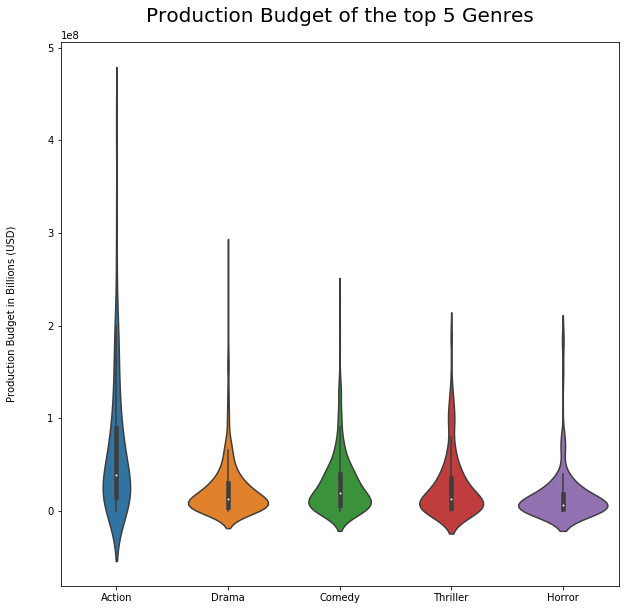

In [34]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax = sns.violinplot(x = 'randomgenre', y = 'production_budget', data=top5genresdf)
ax.set_title("Production Budget of the top 5 Genres", size = 20, pad = 20)
ax.set_xlabel("")
ax.set_ylabel("Production Budget in Billions (USD)",labelpad = 30)

In [35]:
top5genresdf['production_budget'].min()

9000

In [36]:
# What are the genres of the top 250 grossing films of all time by genre

In [37]:
top20grossingfilms = pd.DataFrame(df.groupby(['movie','randomgenre'])['worldwide_gross'].sum().sort_values(ascending = False )[:500])


In [38]:
top20grossingfilms.reset_index(inplace= True)

In [39]:
count = top20grossingfilms.groupby('randomgenre')['movie'].count()

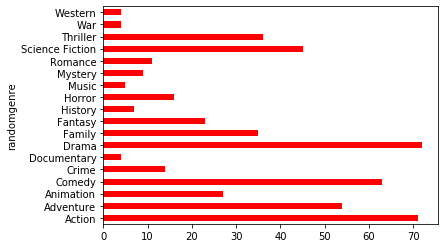

In [40]:
count.plot(kind = 'barh',colormap = 'rainbow_r')

In [41]:
top5genresdf.groupby('randomgenre')['ROI'].median()

randomgenre
Action       82.474568
Comedy      102.955240
Drama        52.289021
Horror       42.503049
Thriller     26.274550
Name: ROI, dtype: float64

Text(0, 0.5, 'Markup')

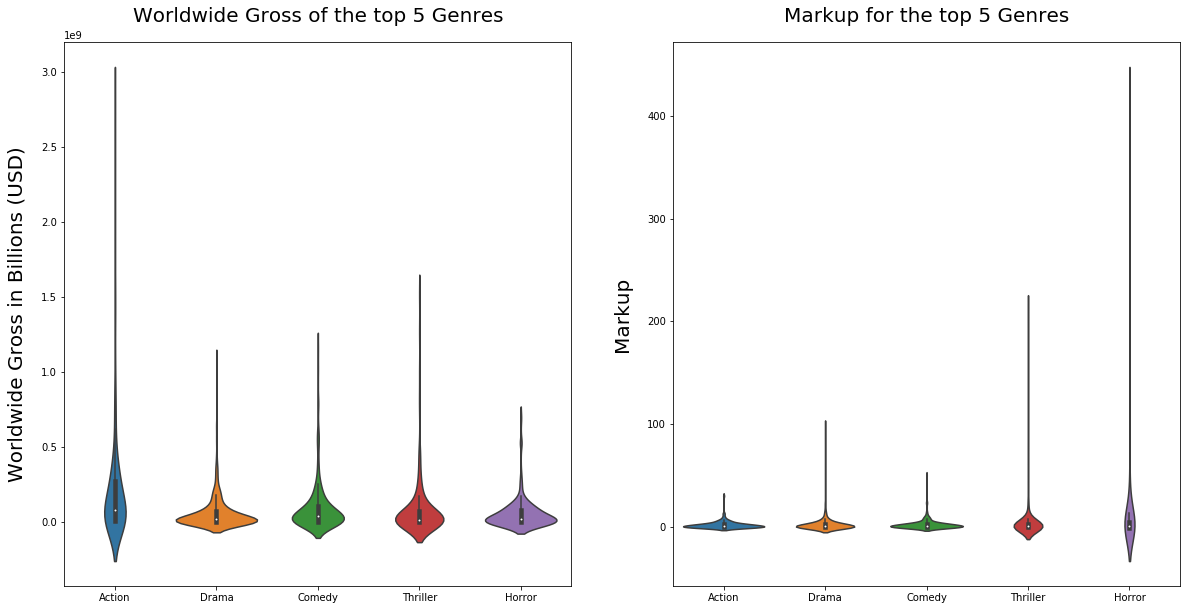

In [42]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax = axes[0]
ax1 = axes[1]


sns.violinplot(x = 'randomgenre', y = 'worldwide_gross', data=top5genresdf,ax=ax)
ax.set_title("Worldwide Gross of the top 5 Genres", size = 20, pad = 20)
ax.set_xlabel("")
ax.set_ylabel("Worldwide Gross in Billions (USD)",labelpad = 15, size = 20)

sns.violinplot(x = 'randomgenre', y = 'markup', data=top5genresdf, ax=ax1)
ax1.set_title("Markup for the top 5 Genres", size = 20, pad = 20)
ax1.set_xlabel("")
ax1.set_ylabel("Markup",labelpad = 15, size = 20)

Text(0, 0.5, 'Production Budget')

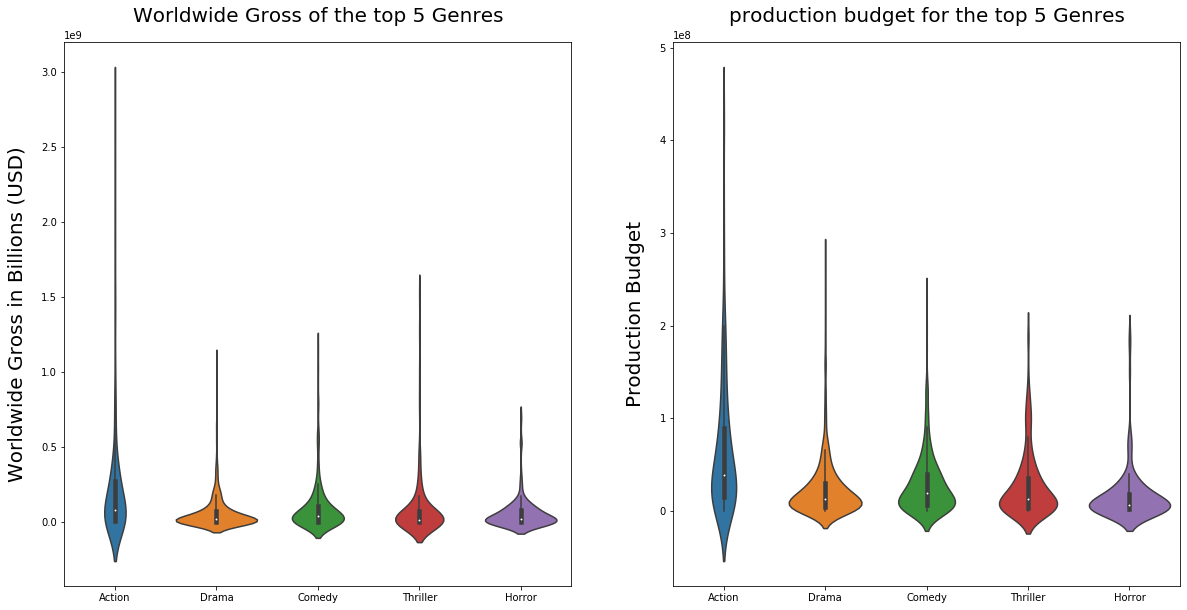

In [43]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax = axes[0]
ax1 = axes[1]


sns.violinplot(x = 'randomgenre', y = 'worldwide_gross', data=top5genresdf, inner = 'box',ax=ax)
ax.set_title("Worldwide Gross of the top 5 Genres", size = 20, pad = 20)
ax.set_xlabel("")
ax.set_ylabel("Worldwide Gross in Billions (USD)",labelpad = 15, size = 20)

sns.violinplot(x = 'randomgenre', y = 'production_budget', data=top5genresdf, ax=ax1)
ax1.set_title("production budget for the top 5 Genres", size = 20, pad = 20)
ax1.set_xlabel("")
ax1.set_ylabel("Production Budget",labelpad = 15, size = 20)